<a href="https://colab.research.google.com/github/MiteshBhanushali/Credit-Card-Default/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
#loading dataset
import xlrd
path='/content/drive/My Drive/CreditCardDefault/default of credit card clients.xls'
credit_data=pd.read_excel(path)

In [5]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
credit_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

Dataset has 25 columns and 30000 rows

In [8]:
credit_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
credit_data.isna().sum() #No missing values in dataset

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
column_list=credit_data.columns.tolist()
column_list

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

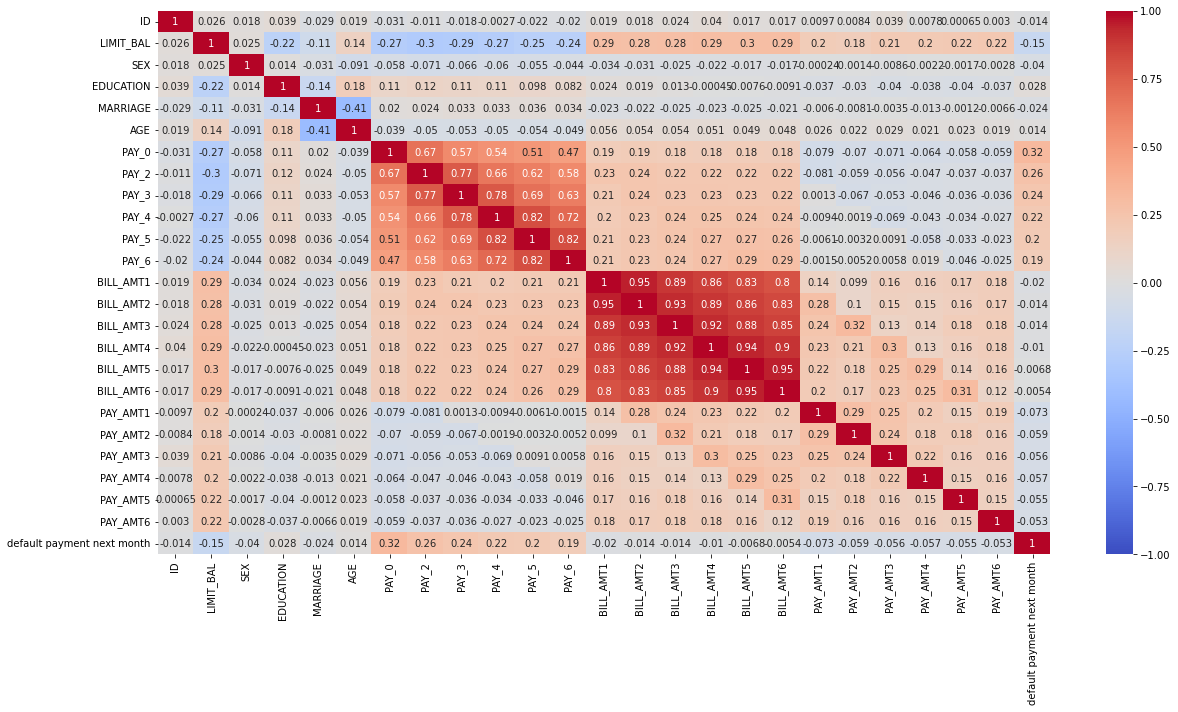

In [11]:
#correlation heat-map 
correlation_df=credit_data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_df,vmin=-1, cmap='coolwarm',annot=True)

Target vriable does not have colinearity with features but there is very high colinearity between feature variables

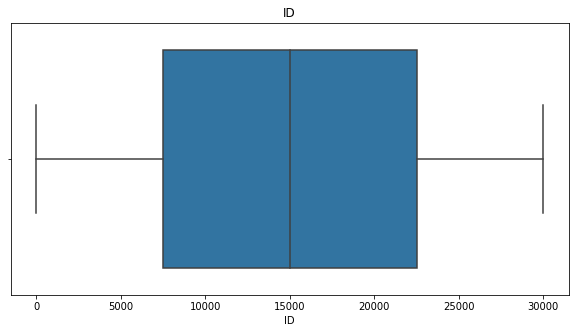

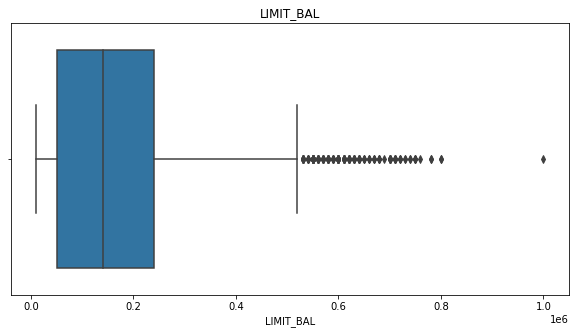

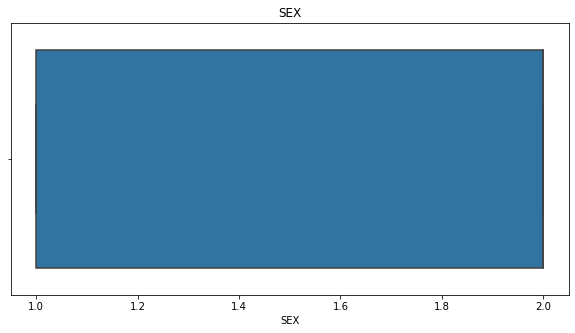

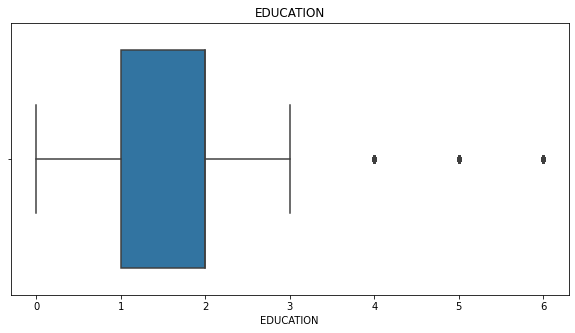

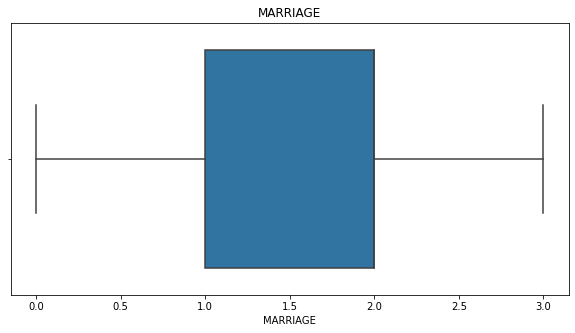

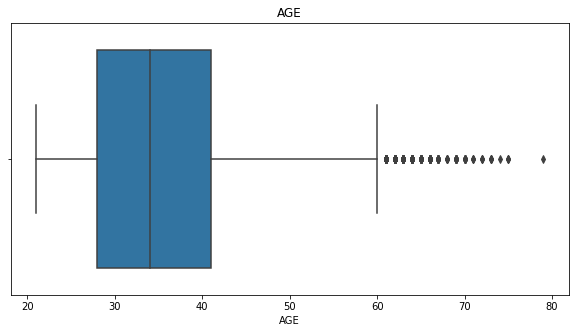

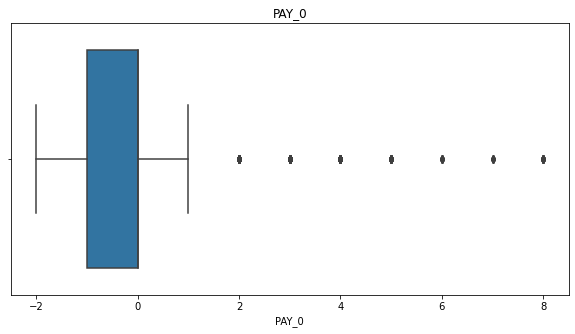

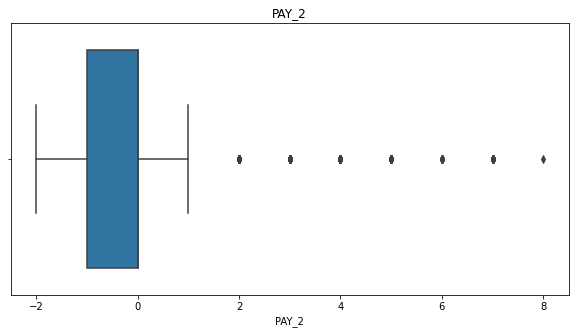

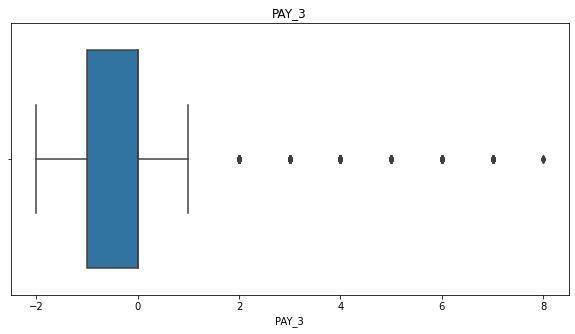

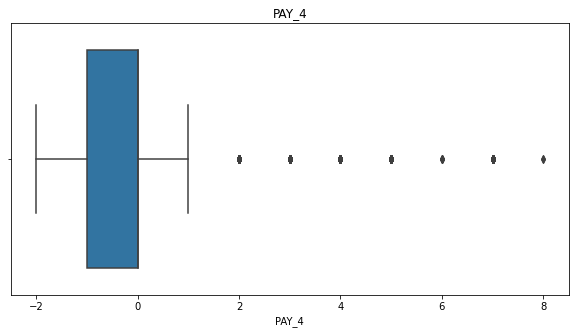

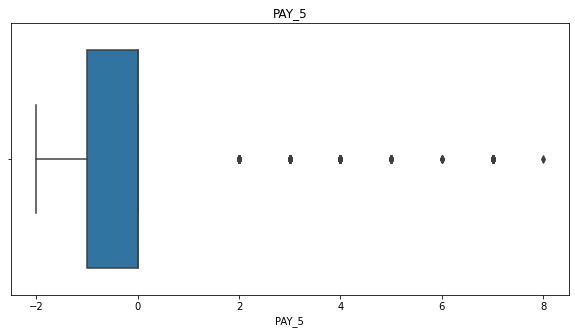

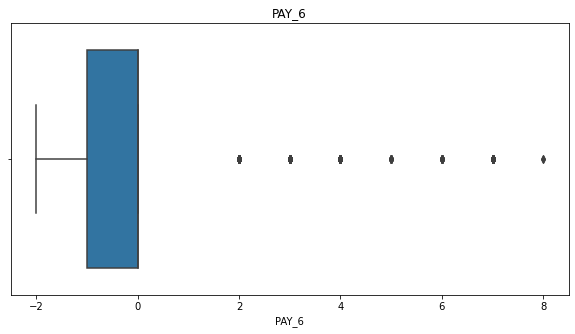

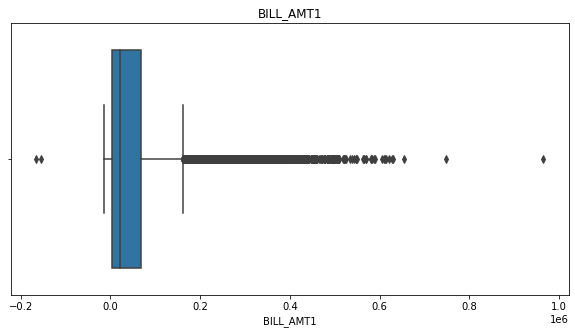

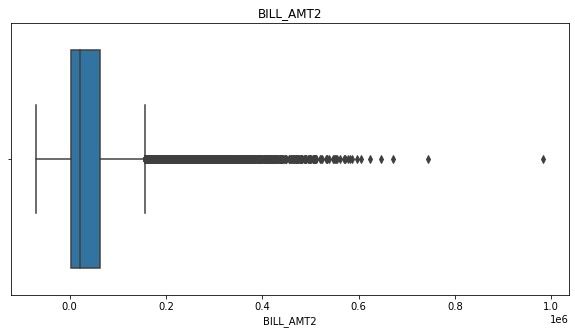

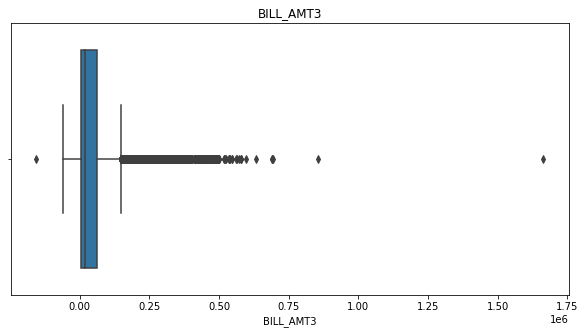

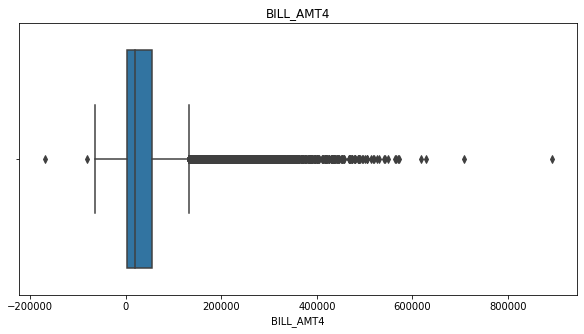

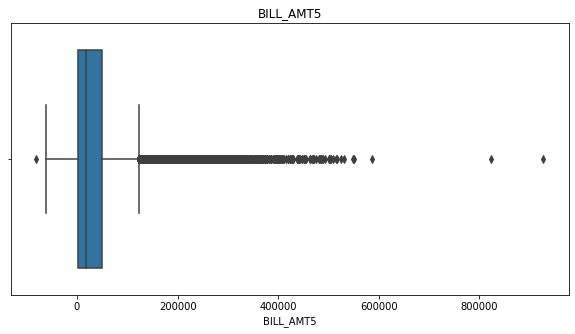

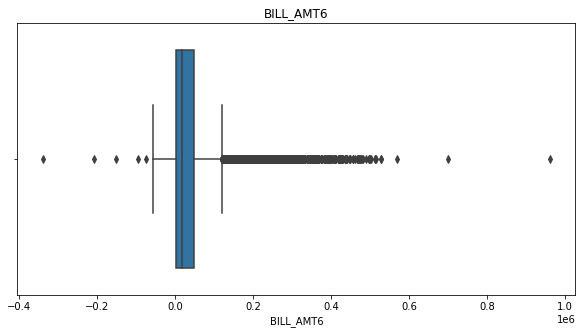

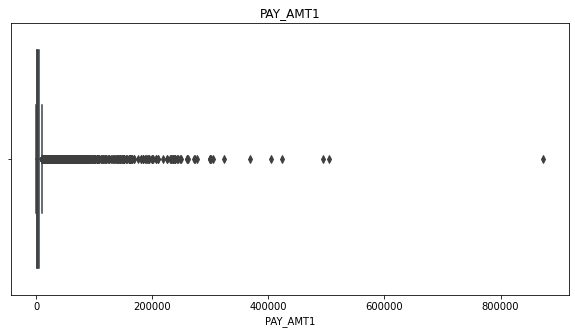

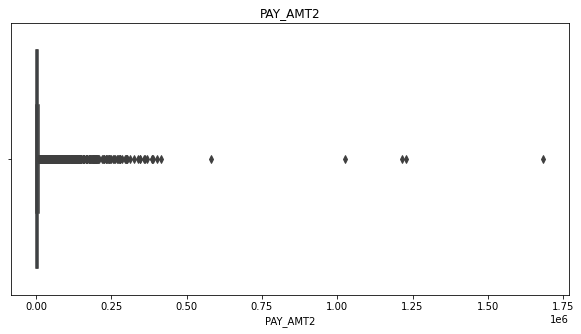

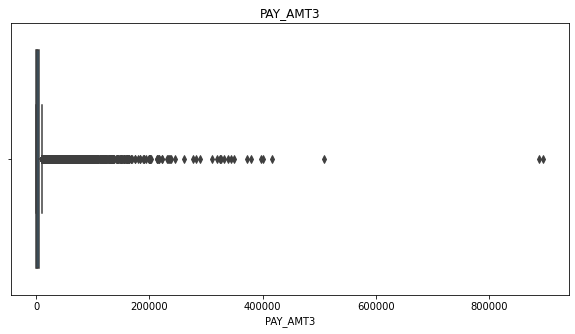

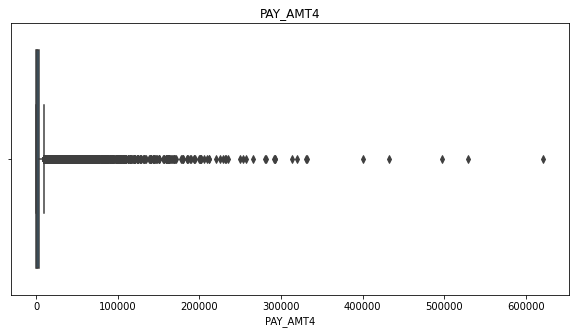

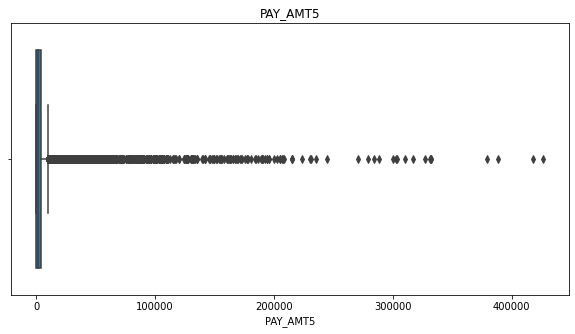

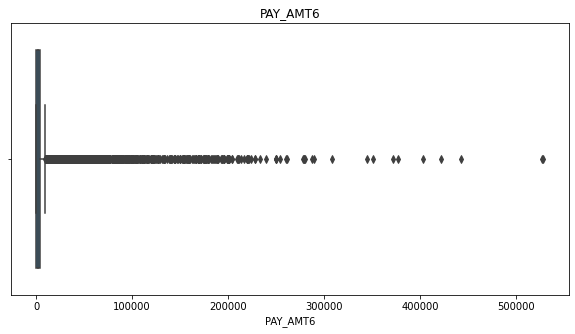

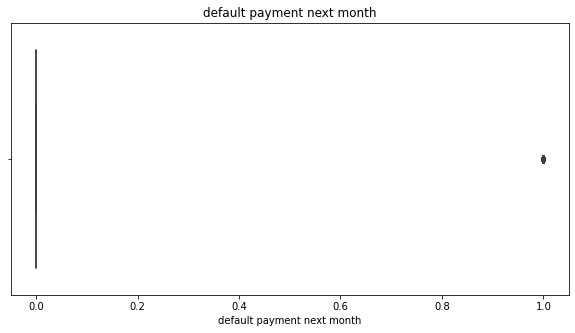

In [12]:
#Checking for outliers
for i in column_list:
  plt.figure(figsize=(10,5))
  sns.boxplot(credit_data[i])
  plt.title(i)

Text(0.5, 1.0, 'Distribution of default payment next month column')

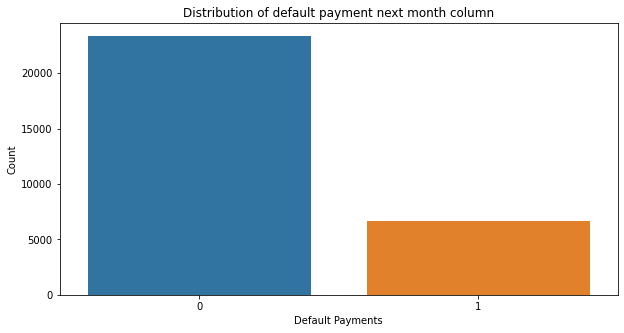

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=credit_data['default payment next month'])
plt.xlabel("Default Payments")
plt.ylabel("Count")
plt.title("Distribution of default payment next month column")
#Class imbalance detected

There is a class imbalance in our dataset

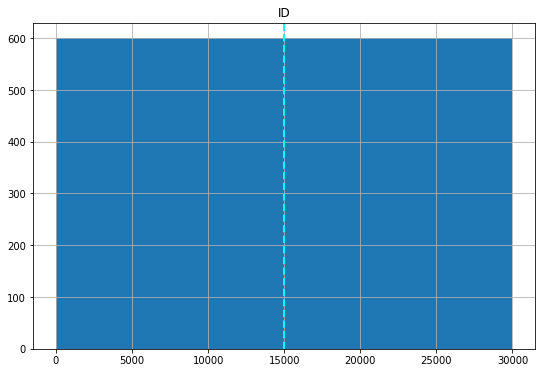

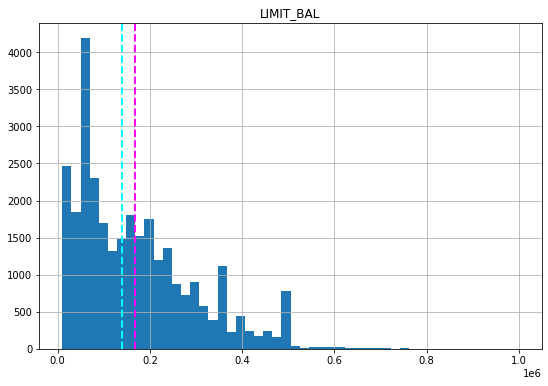

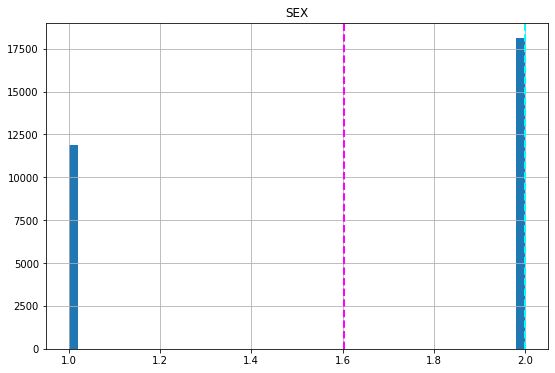

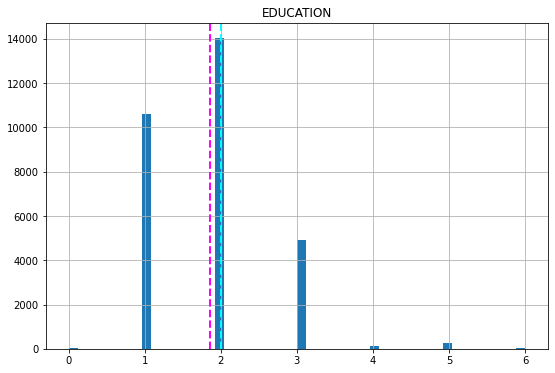

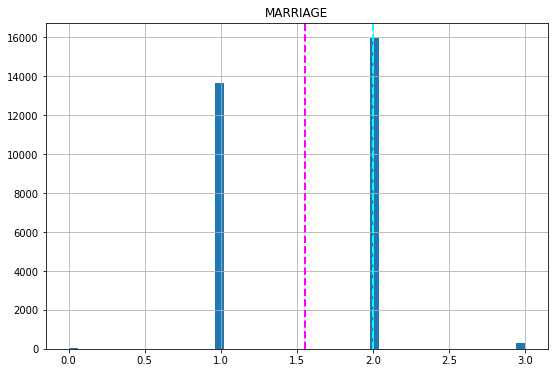

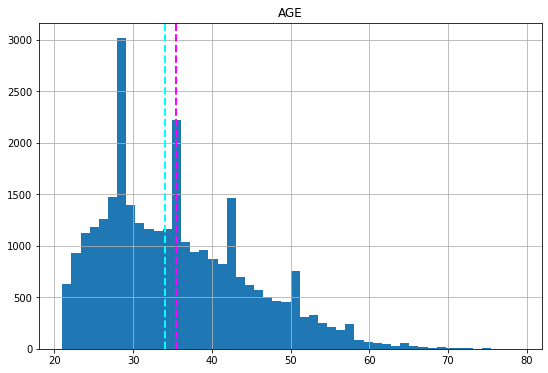

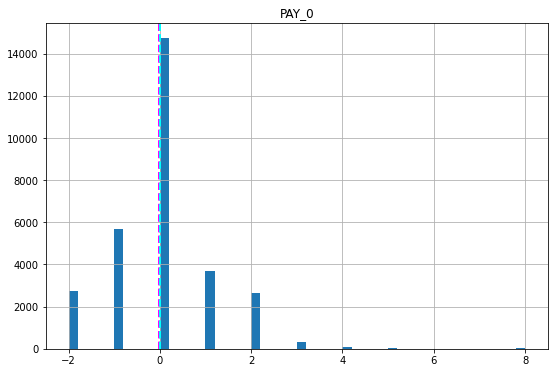

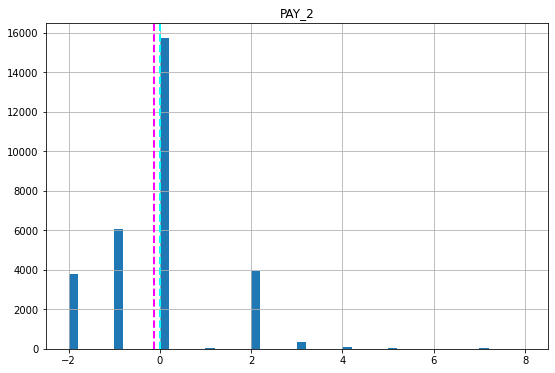

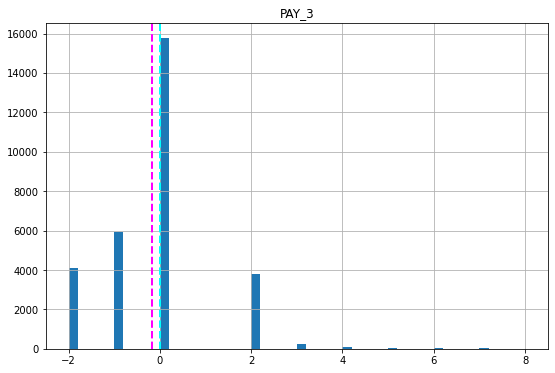

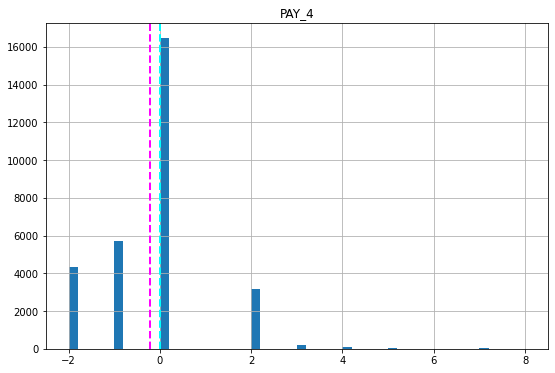

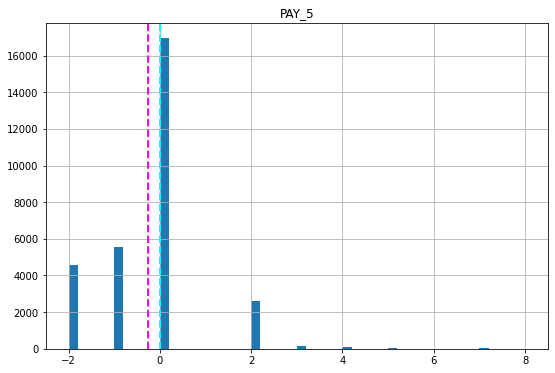

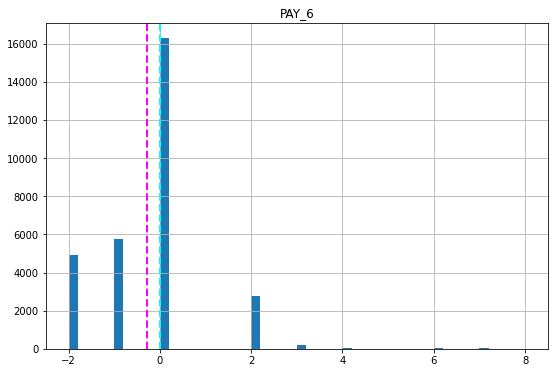

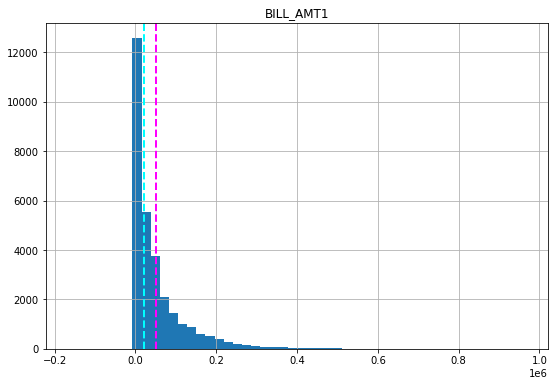

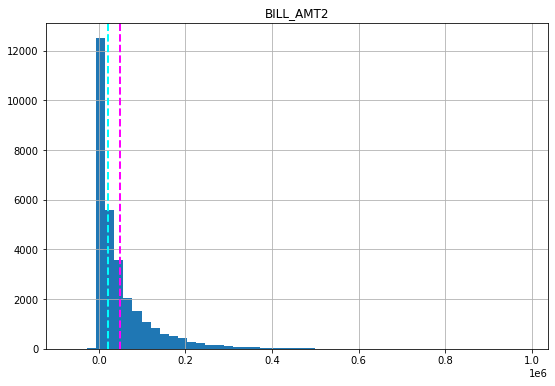

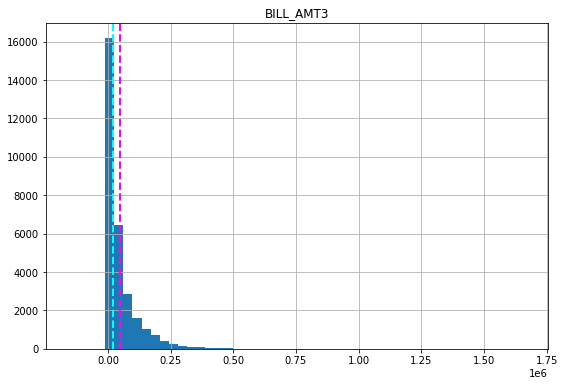

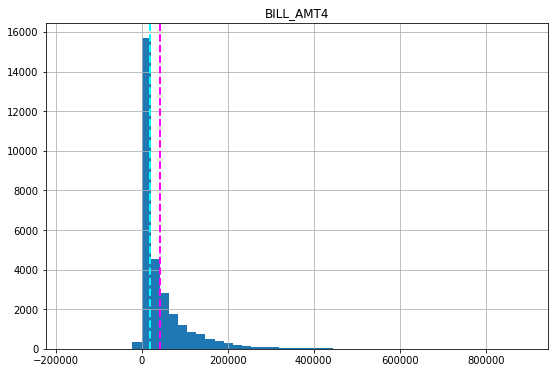

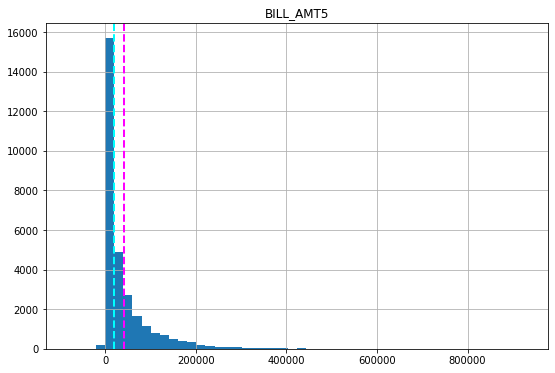

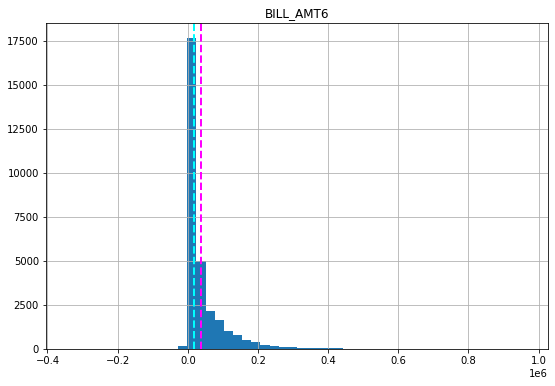

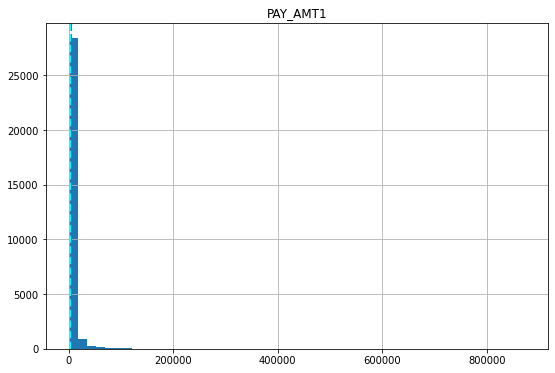

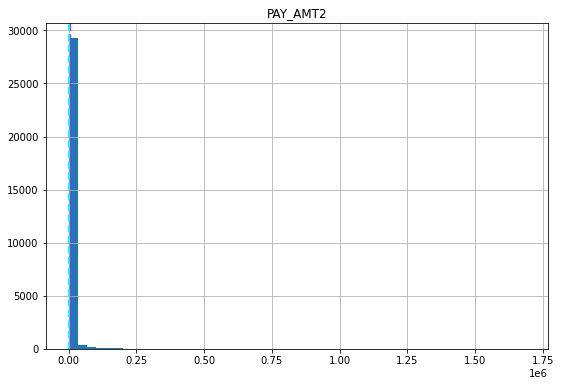

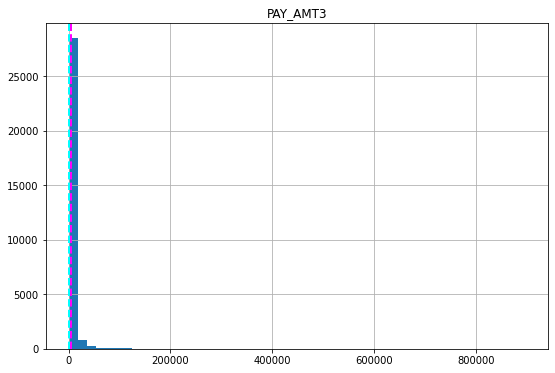

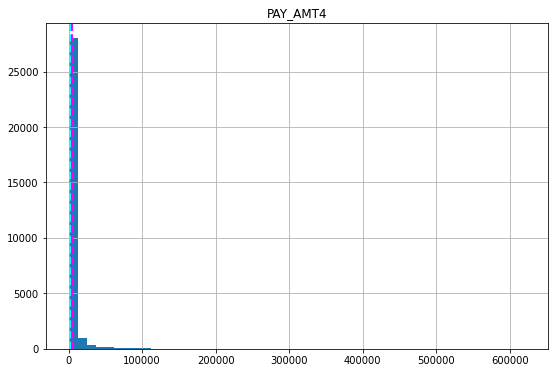

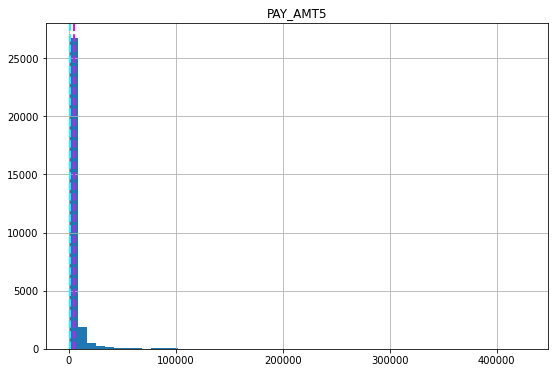

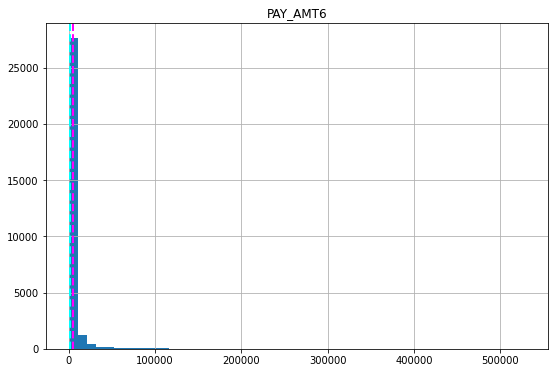

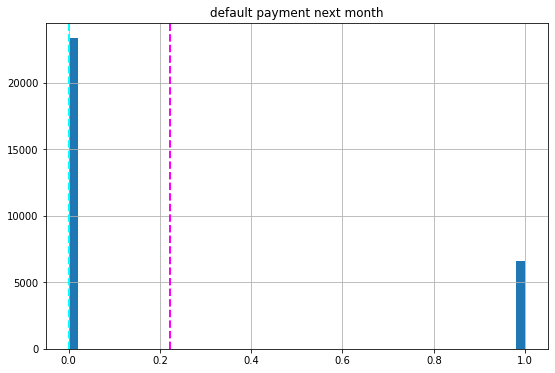

In [14]:
# plot a bar plot for each numerical feature count
for col in column_list[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = credit_data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)  
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [15]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [16]:
calc_vif(credit_data[[i for i in credit_data.describe().columns if i not in ['default payment next month'] ]]).sort_values('VIF')

,variables,VIF
23,PAY_AMT6,1.270781
21,PAY_AMT4,1.807449
22,PAY_AMT5,1.854705
18,PAY_AMT1,1.907529
20,PAY_AMT3,1.911822
6,PAY_0,1.919145
19,PAY_AMT2,2.385527
7,PAY_2,3.212863
11,PAY_6,3.463893
8,PAY_3,3.728466


Multicollinearity is present in our dataset. We cannot drop our columns to remove this multicollinearity because the dataset belongs to finance domain and each column is contributing to predict defaulters

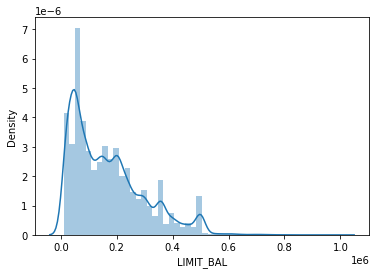

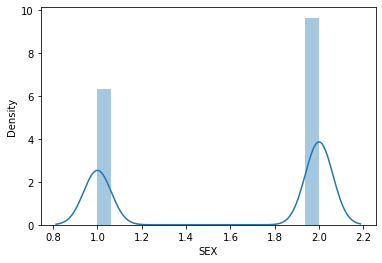

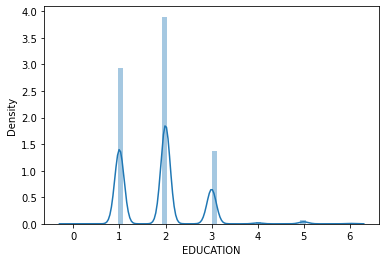

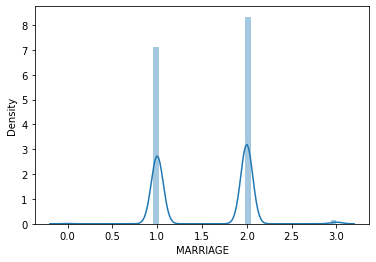

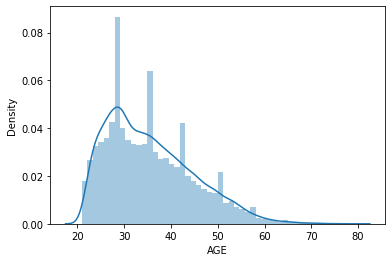

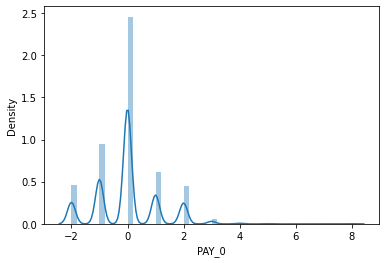

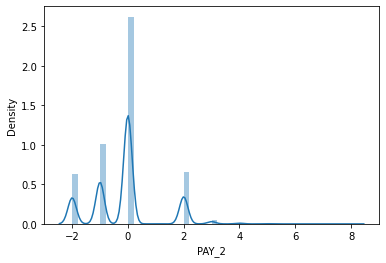

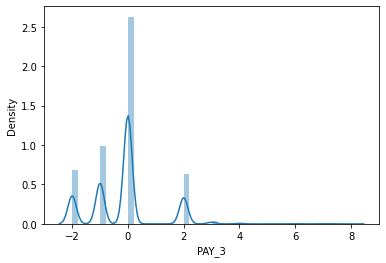

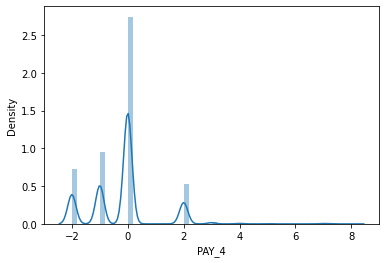

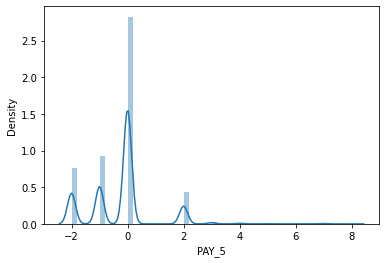

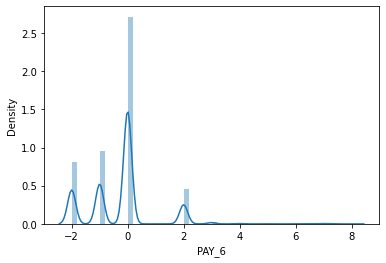

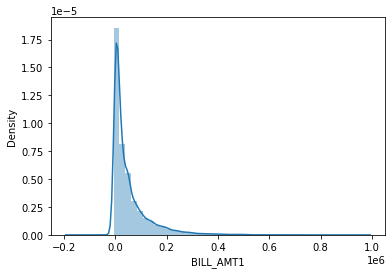

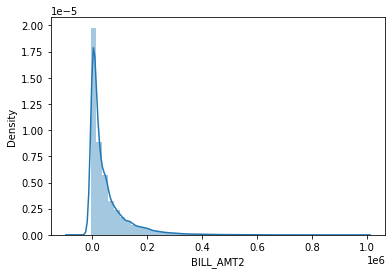

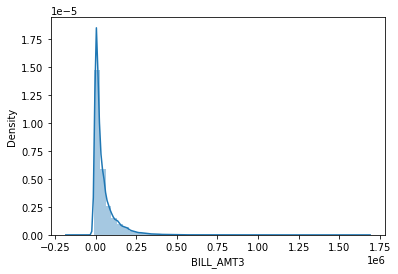

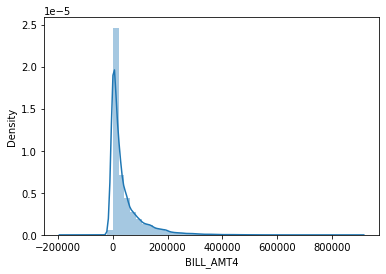

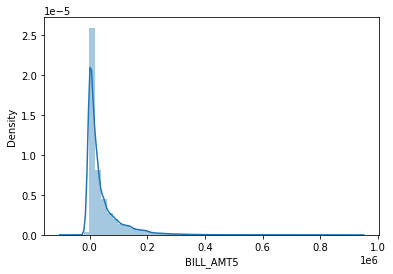

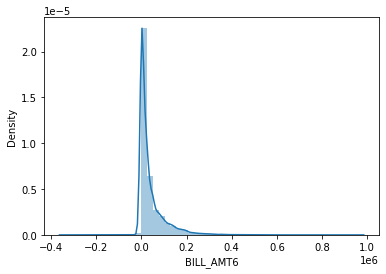

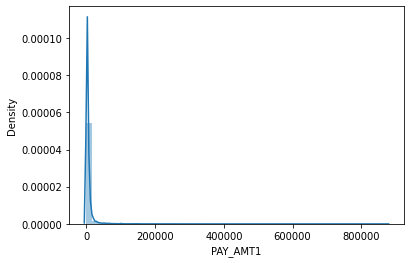

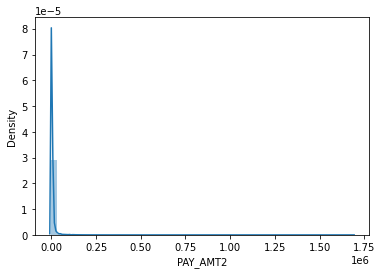

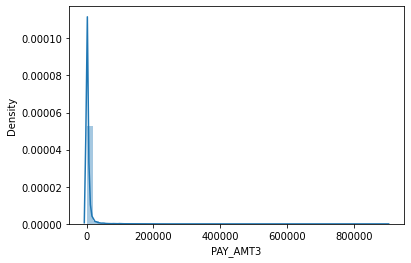

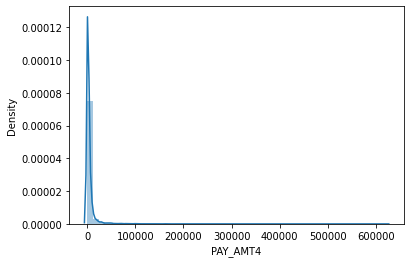

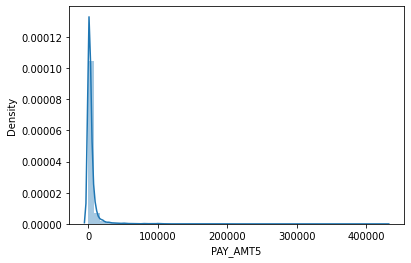

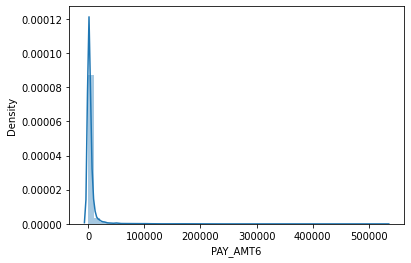

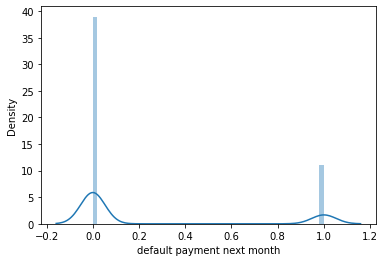

In [17]:
#Checking distribution for each column
for i in column_list[1:]:
  sns.distplot(credit_data[i])
  plt.show()

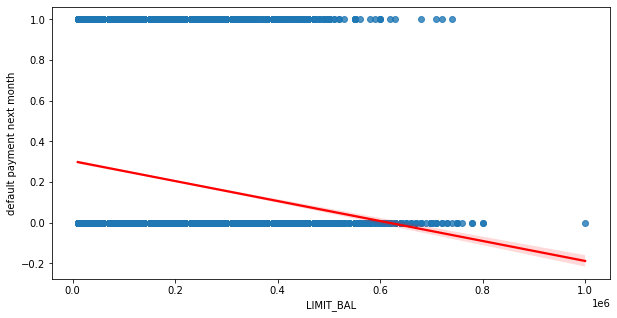

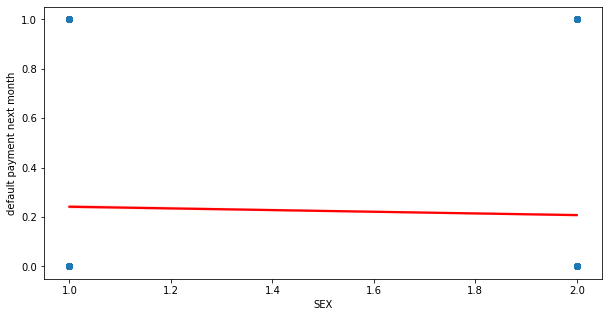

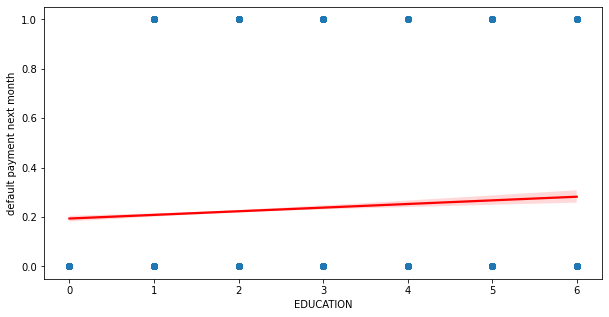

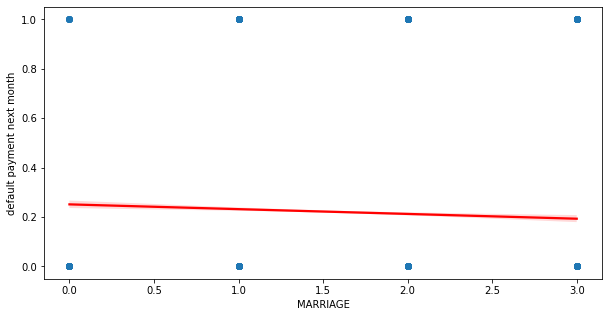

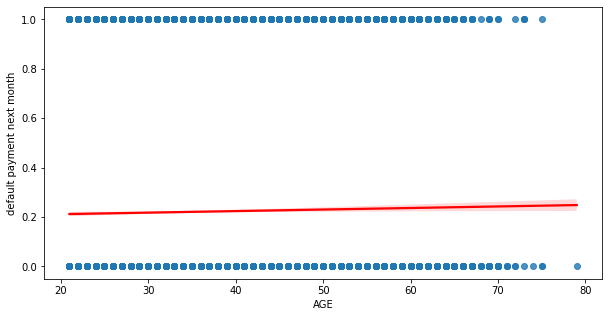

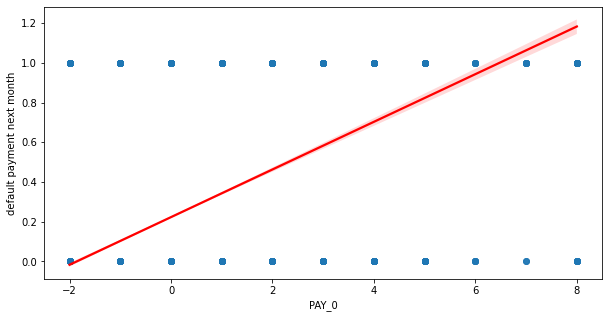

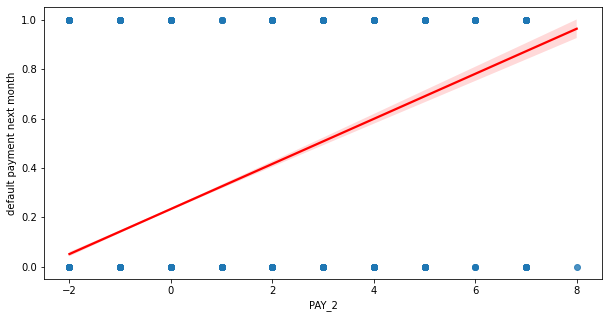

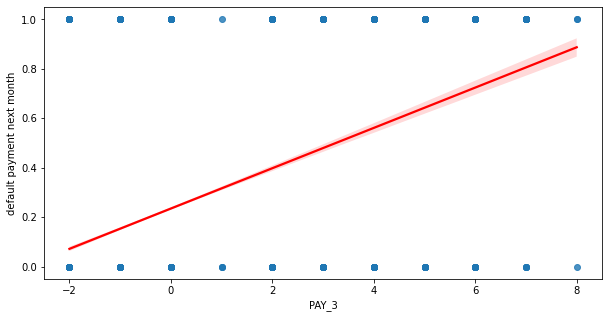

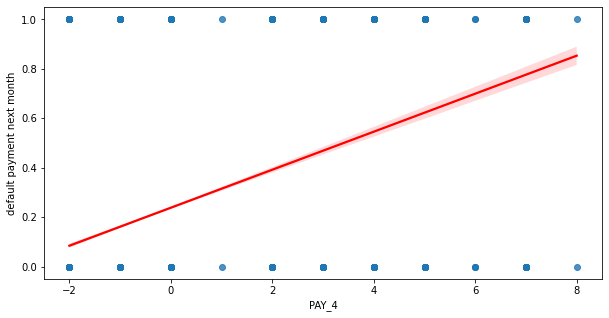

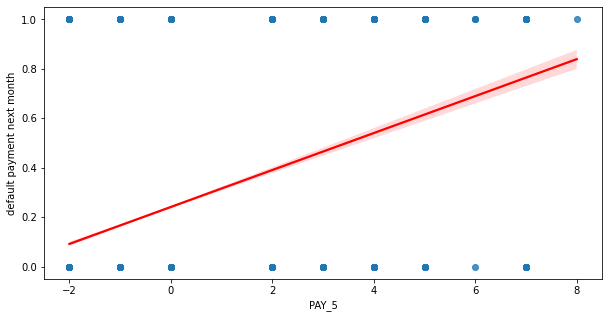

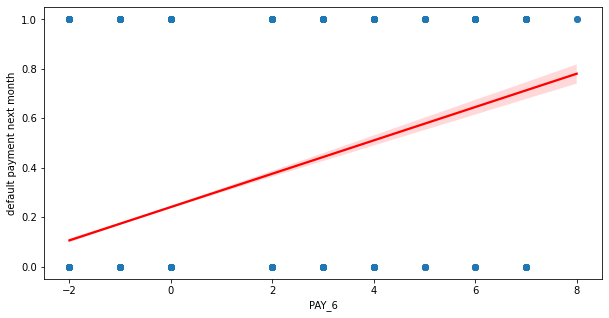

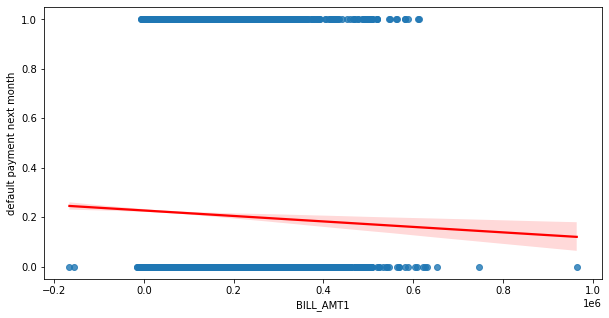

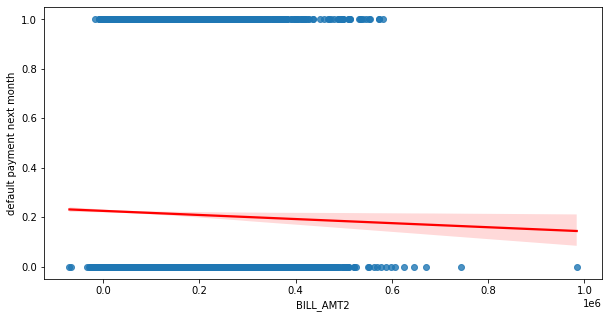

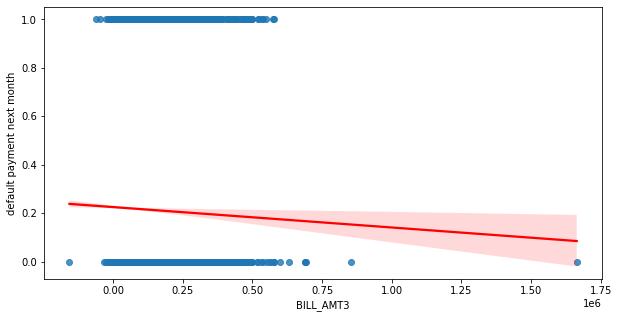

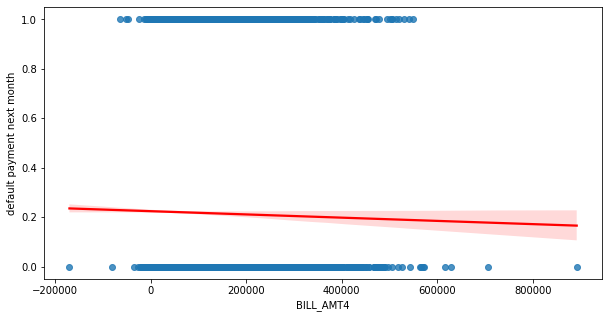

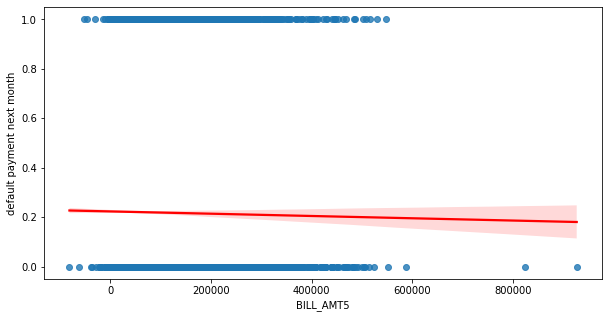

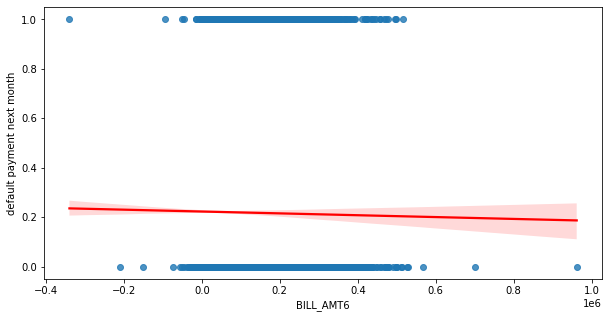

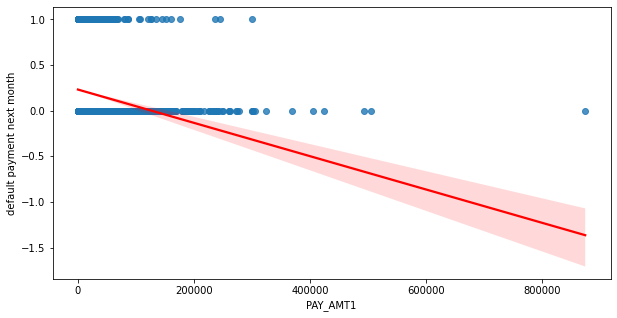

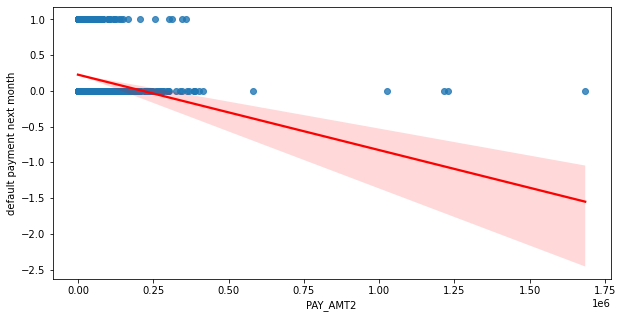

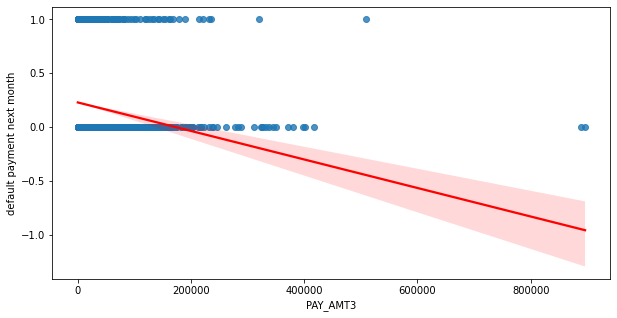

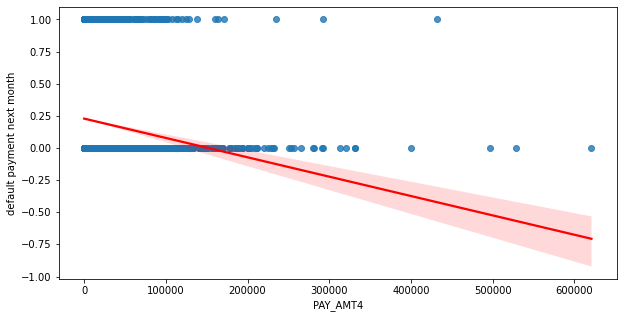

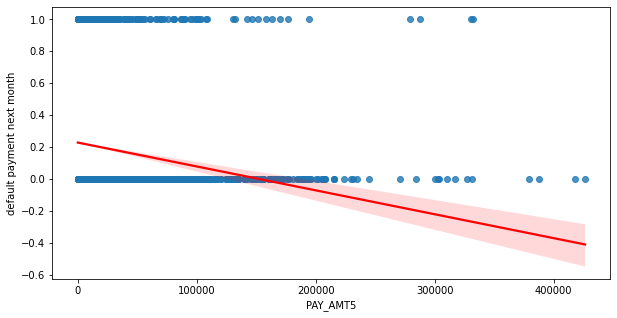

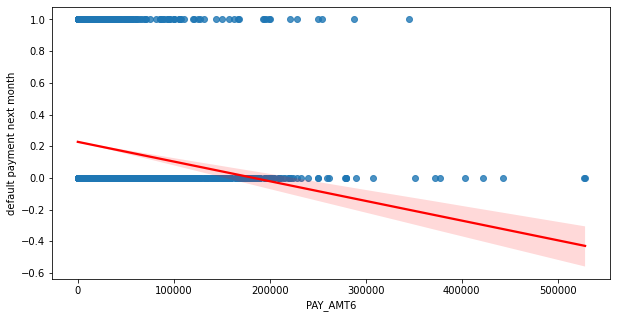

<Figure size 720x360 with 0 Axes>

In [18]:
# ploting Regression plot of each columns of dataset v/s default payment next month
for col in column_list[1:]:
  plt.figure(figsize=(10, 5))
  if col == 'default payment next month':
    pass
  else:
    sns.regplot(x=credit_data[col],y=credit_data["default payment next month"],line_kws={"color": "red"})
  
  plt.show()

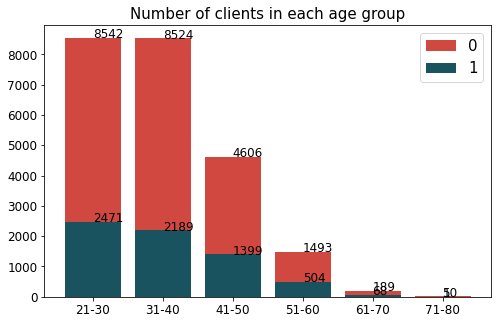

In [19]:
#Creating bins for age to check which age group have high chance to default
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
credit_data['AGE_BIN'] = pd.cut(x=credit_data.AGE, bins=bins, labels=names, right=True)

age_cnt = credit_data.AGE_BIN.value_counts()
age_0 = (credit_data.AGE_BIN[credit_data['default payment next month'] == 0].value_counts())
age_1 = (credit_data.AGE_BIN[credit_data['default payment next month'] == 1].value_counts())

plt.subplots(figsize=(8,5))

plt.bar(age_0.index, age_0.values, label='0', color = ('#d14841'))
plt.bar(age_1.index, age_1.values, label='1', color = ('#195360'))
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

We can see that as age increases the defaluters decreases. Age group 21-30 have maximum defaulters

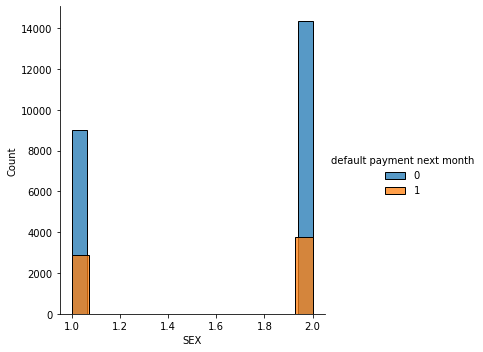

In [21]:
sns.FacetGrid(credit_data, hue = 'default payment next month', size = 5).map(sns.histplot, 'SEX').add_legend()

From above plot we can say that the if sex is 2 it has high probablity of defaulter

In [22]:
credit_data['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [23]:
#Science pay can only take value from -1 to 9 so replacing it with -1
for att in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  filter = (credit_data[att] == -2) | (credit_data[att] == -1) 
  credit_data.loc[filter, att] = -1

In [24]:
credit_data['PAY_0'].value_counts()

 0    14737
-1     8445
 1     3688
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [25]:
credit_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [26]:
#replacing marriage=0 with 2(mode)
credit_data['MARRIAGE'].replace(0,2, inplace = True)

In [27]:
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
edu_condition =(credit_data['EDUCATION'] == 5) | (credit_data['EDUCATION'] == 6) | (credit_data['EDUCATION'] == 4)

In [29]:
#Replacing education 4,5,6 with 3
credit_data.loc[edu_condition, 'EDUCATION' ] = 3

In [30]:
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     5371
0       14
Name: EDUCATION, dtype: int64

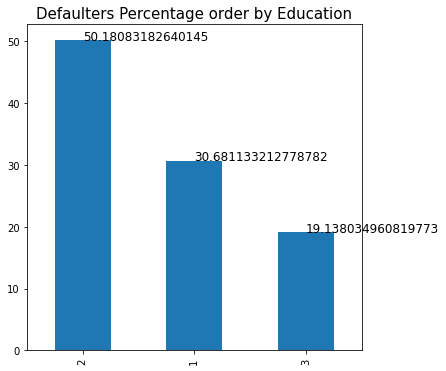

In [31]:
#Cheacking defaulters by Education status
ax = credit_data[credit_data['default payment next month'] == 1]['EDUCATION'].value_counts(normalize = True)*100
ax.plot.bar(figsize=(6,6))

plt.title("Defaulters Percentage order by Education", fontsize=15)
for x,y in zip([0,1,2],ax):
    plt.text(x,y,y,fontsize=12)
plt.show()

University student tendes to default more 

In [32]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_BIN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,21-30
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [33]:
df_final = credit_data.drop(['AGE_BIN', 'ID'], axis = 1)

In [34]:
#Changing datatype of limit balance and age
df_final.LIMIT_BAL  = df_final.LIMIT_BAL.astype("int64")
df_final.AGE  = df_final.AGE.astype("int64")

In [35]:
pd.get_dummies( columns= ['SEX', 'EDUCATION'], prefix = ['SEX', 'EDUCATION'], data = df_final, drop_first = True)

,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3
0,20000,1,24,2,2,-1,-1,-1,-1,3913,...,689,0,0,0,0,1,1,0,1,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,1,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,1,0,1,0
3,50000,1,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,1,0,1,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,36681,10000,9000,689,679,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,39,0,0,0,0,0,0,188948,...,20000,5003,3047,5000,1000,0,0,0,0,1
29996,150000,2,43,-1,-1,-1,-1,0,0,1683,...,3526,8998,129,0,0,0,0,0,0,1
29997,30000,2,37,4,3,2,-1,0,0,3565,...,0,22000,4200,2000,3100,1,0,0,1,0
29998,80000,1,41,1,-1,0,0,0,-1,-1645,...,3409,1178,1926,52964,1804,1,0,0,0,1


Spliting Data in X and Y

In [36]:
X = df_final.drop(['default payment next month'],axis=1)
y = df_final['default payment next month']
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


SMOTE to handle class imblance

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_sm, y_sm = smote.fit_resample(X, y)

print('Original dataset shape', len(df_final))
print('Resampled dataset shape', len(y_sm))

Original dataset shape 30000
Resampled dataset shape 46728


In [38]:
from collections import Counter
counter = Counter(y_sm)
counter

Counter({0: 23364, 1: 23364})

Train-Test Split and Standarization of X

In [39]:
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size = 0.3, random_state = 42,stratify = y_sm)

In [40]:
num_column=['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [41]:
from sklearn.preprocessing import StandardScaler
for i in num_column:
  scl = StandardScaler().fit(x_train_sm[[i]])     # fit on training data columns
  x_train_sm[i] = scl.transform(x_train_sm[[i]]) # transform the training data columns
  x_test_sm[i] = scl.transform(x_test_sm[[i]])   # transform the testing data columns

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

In [43]:
#Creating function to fit the model, predict values and print accuracy
def print_accuracy(model,x_train,x_test,y_train,y_test):
  #Fitting the model
  model.fit(x_train, y_train)
  # Get the predicted classes
  train_class_preds = model.predict(x_train)
  test_class_preds = model.predict(x_test)
  # Get the accuracy scores
  train_accuracy = accuracy_score(train_class_preds,y_train)
  test_accuracy = accuracy_score(test_class_preds,y_test)
  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", test_accuracy)
  print('-------------------------------------------------')
  roc_train=roc_auc_score(y_train,train_class_preds)
  roc_test=roc_auc_score(y_test,test_class_preds)
  print("The roc auc on train data is ", roc_train)
  print("The roc auc on test data is ", roc_test)
  print('-------------------------------------------------')
  print('Confusion Matrix for train is :')
  cm1 = confusion_matrix(y_train, train_class_preds)
  print(cm1)
  print('Confusion Matrix for test is :')
  cm = confusion_matrix(y_test, test_class_preds)
  print(cm)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  # labels, title and ticks
  labels = ['Retained', 'Churned']
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

The accuracy on train data is  0.7255801155645235
The accuracy on test data is  0.7260146943433912
-------------------------------------------------
The roc auc on train data is  0.7255805508714315
The roc auc on test data is  0.7260140162159555
-------------------------------------------------
Confusion Matrix for train is :
[[12099  4255]
 [ 4721 11634]]
Confusion Matrix for test is :
[[5156 1854]
 [1987 5022]]


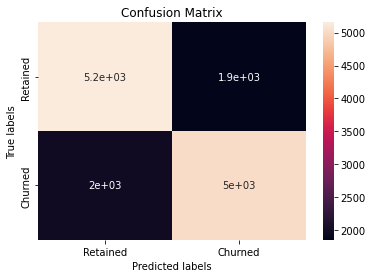

In [44]:
print_accuracy(clf,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [45]:
#Logistical regresion test prediction
#5156 where class 0 and where predicted 0,1854 where class 0 but predicted 1,1987 where class 1 but predicted as 0, 5022 where class 1 and predicted as 1
#The roc auc on test data is  0.7260140162159555

Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

The accuracy on train data is  0.7200158977651411
The accuracy on test data is  0.7148156073899707
-------------------------------------------------
The roc auc on train data is  0.7200183613342028
The roc auc on test data is  0.7148099885433625
-------------------------------------------------
Confusion Matrix for train is :
[[13093  3261]
 [ 5897 10458]]
Confusion Matrix for test is :
[[5563 1447]
 [2551 4458]]


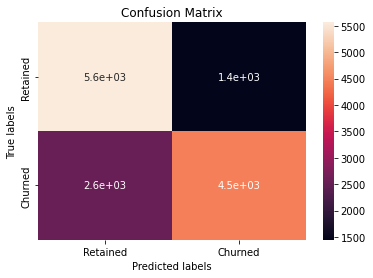

In [47]:
print_accuracy(dt,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [48]:
#DT test prediction
#5563 where class 0 and where predicted 0,1447 where class 0 but predicted 1,2551 where class 1 but predicted as 0,4458 where class 1 and predicted as 1
#The roc auc on test data is  0.7148099885433625

Random Forest with CV

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[40,50, 80,100,120], 'max_depth':[3, 5, 7,9,11]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

The accuracy on train data is  0.8369561894279862
The accuracy on test data is  0.7944931878165347
-------------------------------------------------
The roc auc on train data is  0.8369575567203563
The roc auc on test data is  0.7944903628084454
-------------------------------------------------
Confusion Matrix for train is :
[[14419  1935]
 [ 3398 12957]]
Confusion Matrix for test is :
[[5847 1163]
 [1718 5291]]


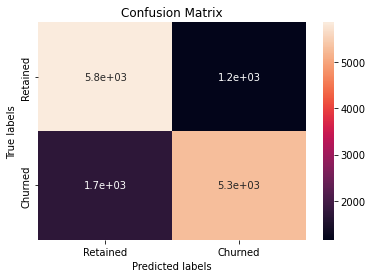

In [50]:
print_accuracy(classifier,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [51]:
#Random Forest test prediction
#5847 where class 0 and where predicted 0, 1163 where class 0 but predicted 1,1718 where class 1 but predicted as 0,5291 where class 1 and predicted as 1
#The roc auc on test data is  0.7944903628084454

KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier_knn = KNeighborsClassifier()
grid_values_knn = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
classifier_knn = RandomizedSearchCV(classifier_knn, param_distributions = grid_values_knn, scoring = 'roc_auc', cv=5)

The accuracy on train data is  0.8075147512916934
The accuracy on test data is  0.7695984021684856
-------------------------------------------------
The roc auc on train data is  0.8075159531172263
The roc auc on test data is  0.7695956838863585
-------------------------------------------------
Confusion Matrix for train is :
[[13849  2505]
 [ 3791 12564]]
Confusion Matrix for test is :
[[5662 1348]
 [1882 5127]]


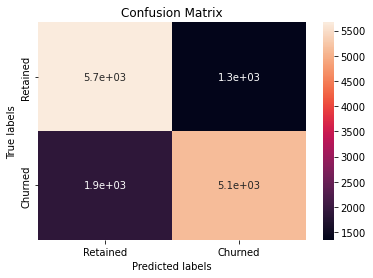

In [53]:
print_accuracy(classifier_knn,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [54]:
#KNN test prediction
#5662 where class 0 and where predicted 0, 1348 where class 0 but predicted 1, 1882 where class 1 but predicted as 0, 5127 where class 1 and predicted as 1
#The roc auc on test data is  0.7695956838863585

XGBoost using GridSearchCV

In [55]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (7, 11, 1),
    'n_estimators': range(60, 180, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

Fitting 2 folds for each of 36 candidates, totalling 72 fits
The accuracy on train data is  0.9480265370387355
The accuracy on test data is  0.8410728297310792
-------------------------------------------------
The roc auc on train data is  0.9480269819004152
The roc auc on test data is  0.8410709869865705
-------------------------------------------------
Confusion Matrix for train is :
[[15742   612]
 [ 1088 15267]]
Confusion Matrix for test is :
[[6077  933]
 [1295 5714]]


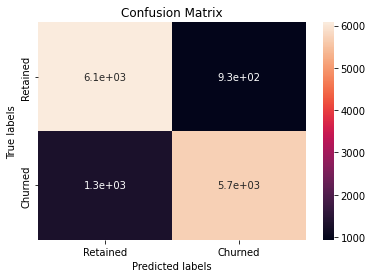

In [56]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parameters,
    scoring = 'roc_auc',
    cv = 2,
    verbose=True
)
print_accuracy(grid_search,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [57]:
#XGBoost test prediction
#6077 where class 0 and where predicted 0, 933 where class 0 but predicted 1, 1295 where class 1 but predicted as 0, 5714 where class 1 and predicted as 1
#The roc auc on test data is  0.8410709869865705

SVM using GridSearchCV

In [58]:
from sklearn.svm import SVC
svc=SVC()
# defining parameter range
param_grid = {'C': [0.1, 100],
              'gamma': [ 0.1, 0.001],
              'kernel': ['rbf']}
grid = GridSearchCV(svc, param_grid,refit = True,scoring = 'roc_auc', verbose = 3)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=  43.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=  44.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=  47.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=  46.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=  43.7s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.772 total time= 1.0min
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.772 total time= 1.0min
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.780 total time=  60.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.781 total time=  54.8s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.785 total time=  56.2s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.845 total time= 3.9min
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;,

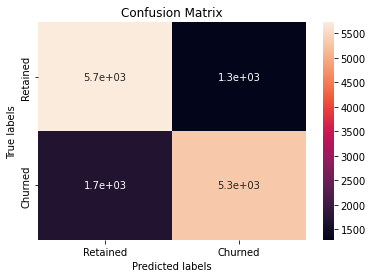

In [59]:
print_accuracy(grid,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [ ]:
#SVM test prediction
#5724 where class 0 and where predicted 0, 1286 where class 0 but predicted 1,1691 where class 1 but predicted as 0, 5318 where class 1 and predicted as 1
#The roc auc on test data is  0.7876432766593756

The accuracy on train data is  0.7275673362071601
The accuracy on test data is  0.7253013767030458
-------------------------------------------------
The roc auc on train data is  0.7275681743653402
The roc auc on test data is  0.7252997623393928
-------------------------------------------------
Confusion Matrix for train is :
[[12347  4007]
 [ 4904 11451]]
Confusion Matrix for test is :
[[5243 1767]
 [2084 4925]]


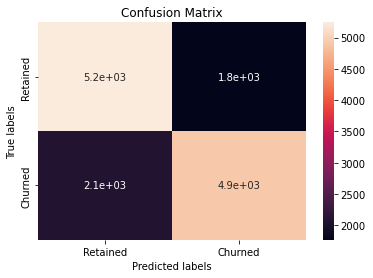

In [61]:
svc2=SVC(kernel='linear', C=100, gamma=0.1)
print_accuracy(svc2,x_train_sm,x_test_sm,y_train_sm,y_test_sm)

In [ ]:
#SVM with linear kernarl test prediction
#5243 where class 0 and where predicted 0, 1767 where class 0 but predicted 1,2084 where class 1 but predicted as 0, 4925 where class 1 and predicted as 1
#The roc auc on test data is  0.7252997623393928

##Conclusion
We have predicted the defaulters using multiple models in this project.We have used Logistical regression, Decision Tree, KNN, XGBoost, SVM. We have also used GridSearchCV to tune hyperparameters. 

We have also seen the class imbalance so we did SMOTE to handle imbalance.

We did train test split and stratify the target variable.

We conclude that out of all models XGBoost performed well with roc auc score of 0.841.

